## Lecture 3_2: Gillespie Simulations

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

****
<span style="color:red;">**Example:** Lotka-Volterra Preditor-Prey dynamics</span>


**Deterministic System**

$$
\begin{aligned}
\frac{dX}{dt}=\alpha X-\beta XY\\
\frac{dY}{dt}=\beta c XY-\gamma Y
\end{aligned}
$$

**Parameters:**

| Parameter | Meaning| Value |
|----------|----------|----------|
| $\alpha$| Prey Birth| 1|
| $\beta$ | Predation rate| 0.02 |
| $c$ | Conversion const. | 0.25|
| $\gamma$ | Predator death|0.2 |

**Initial Conditions**

- $X(0)=200$
- $Y(0)=50$

**Events/Rates**

| Event | Rates | $\Delta \text{state}$ |
|----------|----------|----------|
|Prey Birth|$\alpha X(t)$|$\left[1,0\right]$|
|Predation|$\beta X(t)Y(t)$|$\left[-1,0\right]$|
|Pred. Birth|$\beta c X(t)Y(t)$|$\left[0,1\right]$|
|Pred. Death|$\gamma Y(t)$|$\left[0,-1\right]$|

**3. Use a Gillespie Simulation to simulate 50 Trajectories of the Lotka Volterra Model if there are initially $X(0)=100$ and $Y(0)=20$.**





In [121]:
# Define reaction rates
def rates(state):
    return np.array([1*state[0],0.02*state[0]*state[1],0.02*0.25*state[0]*state[1],0.2*state[1]])

def gillespie(tMax):
    # Lists to store results for plotting
    time= np.array([[0]])
    state = np.array([[100,20]])
    events = np.array([[1,0], [-1,0], [0,1],[0,-1]])
    temp=rates(state[-1])
    dt=np.random.exponential(scale=1/np.sum(temp))
    while time[-1]+dt<tMax:
        time=np.vstack([time, time[-1]+dt])
        # Perform a weighted random choice
        random_event = random.choices(events, temp)
        state=np.vstack([state,state[-1]+random_event])
        # Calculate new rates and new dt
        temp=rates(state[-1])
        #The case of extinction
        if np.sum(temp)>0:
            dt=np.random.exponential(scale=1/np.sum(temp))
        else:
            dt=tMax-time[-1]
    return [time, state]

In [124]:
# Create a dictionary to store results
sim_dict = {}

# Calculate and save results for specified indices
for index in range(20):
    sim_dict[index] = gillespie(50)

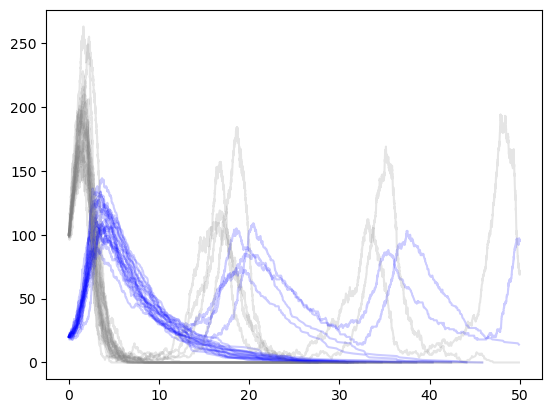

In [125]:
for index in range(20):
    plt.plot(sim_dict[index][0],sim_dict[index][1][:,0],color='gray',alpha=0.2)
    plt.plot(sim_dict[index][0],sim_dict[index][1][:,1],color='blue',alpha=0.2)

**4. Compare the stochastic dynamics to the deterministic dynamics for this model.**

In [137]:
from scipy.integrate import solve_ivp
def rhs(s, v): 
    return [v[0]-0.02*v[0]*v[1],0.02*0.25*v[0]*v[1]-0.2*v[1]]
res = solve_ivp(rhs, (0, 50), [100,20])

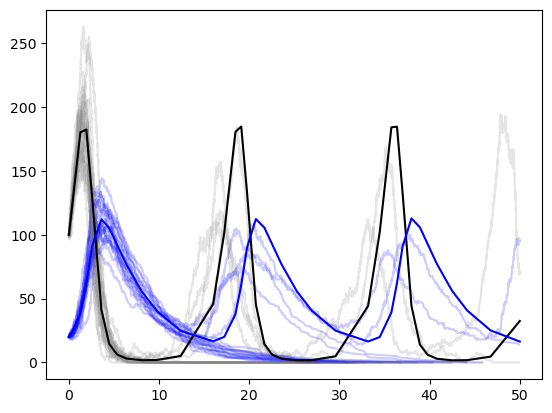

In [138]:
for index in range(20):
    plt.plot(sim_dict[index][0],sim_dict[index][1][:,0],color='gray',alpha=0.2)
    plt.plot(sim_dict[index][0],sim_dict[index][1][:,1],color='blue',alpha=0.2)
plt.plot(res.t,res.y[0],color='black')
plt.plot(res.t,res.y[1],color='blue')